# DSI Capstone

Ship Detection using satellite imagery from Planet 

In [8]:
# load libraries
import json
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [104]:
from sklearn.cross_validation import train_test_split

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical

In [2]:
# load data
f = open(r'/Users/meredithjackson/Desktop/ga/capstone/data/shipsnet.json')
dataset = json.load(f)
f.close()

# show keys
dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

#### Exploratory Data Analysis

In [49]:
data = np.array(dataset['data']).astype('uint8')
labels = np.array(dataset['labels']).astype('uint8')

In [65]:
np.bincount(labels)
# There are 2100 images labeled 'ship' and 700 labeled 'not ship'

array([2100,  700])

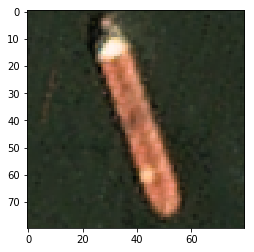

In [76]:
# transpose data, plot 0th image
# reshape to flatten, 3 bands(RGB), 80x80, 
data_rt = data.reshape(-1,3,80,80).transpose([0,2,3,1])

plt.imshow(data_rt[0])

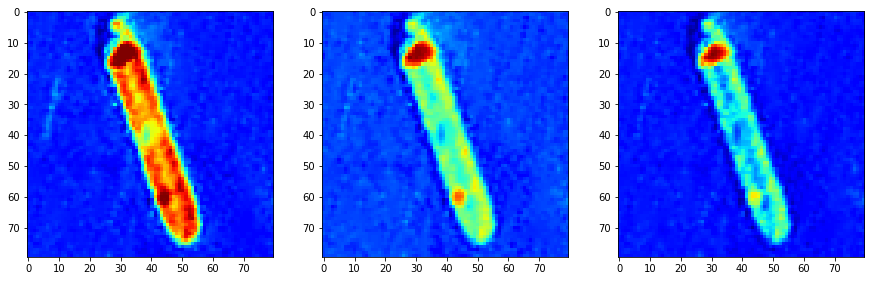

In [64]:
X = data.reshape(-1,3,80,80)

# split out bands
R_band = X[0][0]
G_band = X[0][1]
B_band = X[0][2]

plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# plot each band
plt.subplot(131)
plt.imshow(R_band)

plt.subplot(132)
plt.imshow(G_band)

plt.subplot(133)
plt.imshow(B_band)
    
plt.show()

#### Prep data for training

In [107]:
# create y class as categorial data, assign labels and designate 2 classes
y = to_categorical(labels, 2)

# shuffle images
indexes = np.arange(data.shape[0])
np.random.shuffle(indexes)

# transpose, normalize pixel values
data = X[indexes].transpose([0,2,3,1]) / 255
target = y[indexes]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.3, random_state=42)

In [113]:
X_train.shape

(1960, 80, 80, 3)

#### Create network

In [114]:
np.random.seed(42)

# binary classification model
model = Sequential()

input_shape = (80,80,3)
input_units = X_train.shape[1]
hidden_units = input_units

model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same',
                input_shape=input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [115]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['binary_accuracy'])

In [116]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                   epochs=10, verbose=2, shuffle=True)

Train on 1960 samples, validate on 840 samples
Epoch 1/10
 - 16s - loss: 0.4613 - binary_accuracy: 0.7974 - val_loss: 0.3308 - val_binary_accuracy: 0.9000
Epoch 2/10
 - 17s - loss: 0.2646 - binary_accuracy: 0.8923 - val_loss: 0.2380 - val_binary_accuracy: 0.9274
Epoch 3/10
 - 17s - loss: 0.2088 - binary_accuracy: 0.9163 - val_loss: 0.1558 - val_binary_accuracy: 0.9298
Epoch 4/10
 - 17s - loss: 0.1750 - binary_accuracy: 0.9316 - val_loss: 0.1616 - val_binary_accuracy: 0.9476
Epoch 5/10
 - 16s - loss: 0.1475 - binary_accuracy: 0.9449 - val_loss: 0.1141 - val_binary_accuracy: 0.9667
Epoch 6/10
 - 16s - loss: 0.1297 - binary_accuracy: 0.9526 - val_loss: 0.1357 - val_binary_accuracy: 0.9417
Epoch 7/10
 - 17s - loss: 0.1030 - binary_accuracy: 0.9638 - val_loss: 0.0823 - val_binary_accuracy: 0.9667
Epoch 8/10
 - 17s - loss: 0.0972 - binary_accuracy: 0.9622 - val_loss: 0.1086 - val_binary_accuracy: 0.9667
Epoch 9/10
 - 16s - loss: 0.1071 - binary_accuracy: 0.9668 - val_loss: 0.0670 - val_binar

#### Plot Model Performance

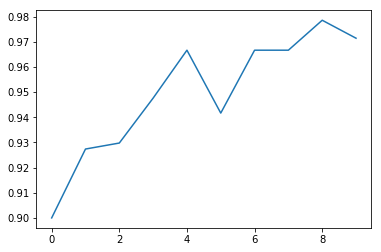

In [117]:
plt.plot(history.history['val_binary_accuracy'])

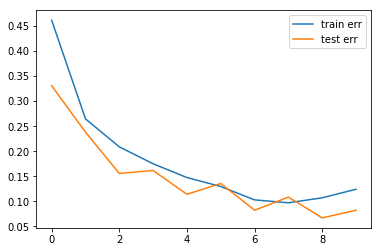

In [118]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='train err')
plt.plot(test_loss, label='test err')
plt.legend()

In [31]:


# train model on ship, not ship
# apply/ predict to testing data

# train 2D on each band, ensemble method